# Articles 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
articles = pd.read_csv('articles_data.csv')

In [7]:
articles.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [8]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

In [14]:
articles.isnull().sum()

Unnamed: 0                            0
source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

In [13]:
missing_values = articles.isnull().sum()
percentage_na = round((missing_values.sum()/articles.size) * 100, 2)
print(f'The percentage of missing values in the dataset is {percentage_na}%')

The percentage of missing values in the dataset is 2.22%


In [15]:
articles.duplicated().sum()

0

In [17]:
articles.drop('Unnamed: 0', axis='columns', inplace=True)

In [18]:
articles.sample(5)

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
6663,cbs-news,CBS News,Grace Segers,"Trump says gun control negotiations are ""going...","In an interview with Fox News, Trump said his ...",https://www.cbsnews.com/news/donald-trump-gun-...,https://cbsnews2.cbsistatic.com/hub/i/r/2019/0...,2019-09-19T15:04:17Z,President Trump contradicted reports that the ...,0.0,0.0,0.0,5.0,0.0
10076,business-insider,Business Insider,Rachel Green,Wells Fargo projects up to 10% of banking jobs...,This story was delivered to Business Insider I...,https://www.businessinsider.com/wells-fargo-pr...,https://image.businessinsider.com/5b2d4f0b1ae6...,2019-10-03T14:34:06Z,Advancements in technology will lead the banki...,0.0,0.0,0.0,4.0,0.0
3822,newsweek,Newsweek,Shane Croucher,Florida Teacher Finds 'Detailed' Mass Shooting...,The high school teacher in Florida found a not...,https://www.newsweek.com/florida-mass-shooting...,https://d.newsweek.com/en/full/1526214/florida...,2019-09-10T11:20:17Z,Police in Florida arrested a teenage high scho...,0.0,23.0,18.0,30.0,0.0
2358,cnn,CNN,"Lisa Respers France, CNN",Demi Lovato is done editing her bathing suit pics,"Demi Lovato is ""Sorry Not Sorry"" about her swi...",https://www.cnn.com/2019/09/06/entertainment/d...,https://cdn.cnn.com/cnnnext/dam/assets/1909061...,2019-09-06T14:39:16Z,NaN,0.0,37.0,10.0,43.0,0.0
8835,the-irish-times,The Irish Times,Peter Hamilton,Michael O’Leary changes his tune on Brexit,Warnings over grounded planes had been issued,https://www.irishtimes.com/business/transport-...,https://www.irishtimes.com/image-creator/?id=1...,2019-10-01T13:03:10Z,While Michael OLeary said on Tuesday that Brex...,0.0,2.0,4.0,6.0,0.0


In [19]:
articles.columns

Index(['source_id', 'source_name', 'author', 'title', 'description', 'url',
       'url_to_image', 'published_at', 'content', 'top_article',
       'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count'],
      dtype='object')

In [154]:
df = articles[['source_name', 'author', 'title', 'description', 'url', 'content', 'top_article',
       'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count']]

In [21]:
df.head()

,source_name,author,title,description,url,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,NaN,0.0,0.0,0.0,0.0,0.0


### Dealing with Missing Values

In [52]:
# using a for loop to fill all the null values with the mean could skew our data. filling them with zeros seems great
# null = True
# for i in (df.isna().any()):
#     if i == null:
#         df = df.fillna(np.mean(i))

In [156]:
df.fillna(0, inplace=True)

In [157]:
df.isna().sum()

source_name                        0
author                             0
title                              0
description                        0
url                                0
content                            0
top_article                        0
engagement_reaction_count          0
engagement_comment_count           0
engagement_share_count             0
engagement_comment_plugin_count    0
dtype: int64

# Visualization
1. **To Do**
- [x] Frequency of top articles from author and source names
- [x] Top articles from author and source names
- [x] Top engagement reaction in title and description depending with source names
- [x] Wordcloud of top 3 description with top comments

### Frequency of top 10 articles from author

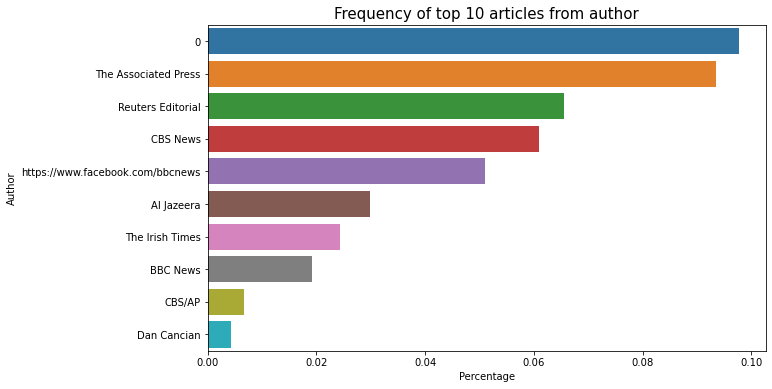

In [171]:
top10_article_authors = df['author'].value_counts(normalize=True).reset_index().head(10)
top10_article_authors = top10_article_authors.rename(columns={'index':'Author', 'author':'Percentage'})
top10_article_authors

plt.figure(figsize=(10, 6))
plt.title('Frequency of top 10 articles from author', fontsize=15)
sns.barplot(y=top10_article_authors['Author'], x=top10_article_authors['Percentage'], data=top10_article_authors)
plt.show()

- We have an unnamed author topping the list of more articles followed by The Associated Press are the authors then by Reuters Editorial.
- Al Jazeera had more articles than BBC News

### Frequency of top 10 articles from Source Names

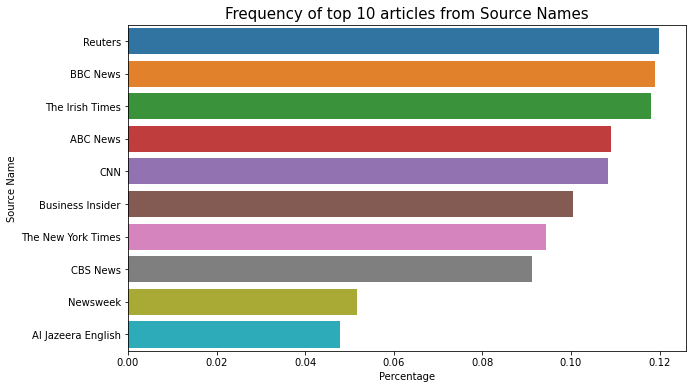

In [172]:
top10_article_source_name = df['source_name'].value_counts(normalize=True).reset_index().head(10)
top10_article_source_name = top10_article_source_name.rename(columns={'index':'Source Name', 'source_name':'Percentage'})
top10_article_source_name

plt.figure(figsize=(10, 6))
plt.title('Frequency of top 10 articles from Source Names', fontsize=15)
sns.barplot(y=top10_article_source_name['Source Name'], x=top10_article_source_name['Percentage'], data=top10_article_source_name)
plt.show()

- Reuters tops the lists of sources of articles followed by BBC News. As opposed where Al Jazeera had more articles than BBC News, we see that BBC News provided more sources than Al Jazeera. This could be because perhaps BBC News has few authors but more articles that maybe Al Jazeera used and sourced BBC News as the source of their articles
- CBS News came third after Reuters Editorial with more articles from authors but we see CNN has more sources of articles than CBS News. 

In conclusion, authors does not tell that they have more articles but sources does. This is evident from the 2 above graphs

### Top articles from top 10 Authors

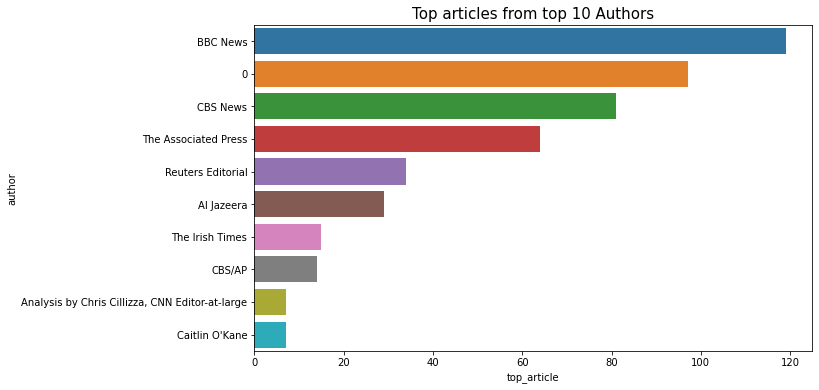

In [182]:
top_authors = df.groupby(['author'])['top_article'].sum().sort_values(ascending=False).reset_index().head(10)
top_authors

plt.figure(figsize=(10, 6))
plt.title('Top articles from top 10 Authors', fontsize=15)
sns.barplot(y=top_authors['author'], x=top_authors['top_article'], data=top_authors)
plt.show()

- BBC News tops the list of top 10 articles from authors, followed by unnamed author then CBS News then The Associated Press.
- Reuters Editorial comes after The Associated Press, then Al Jazeera follows.

### Top articles from top 10 Source Names

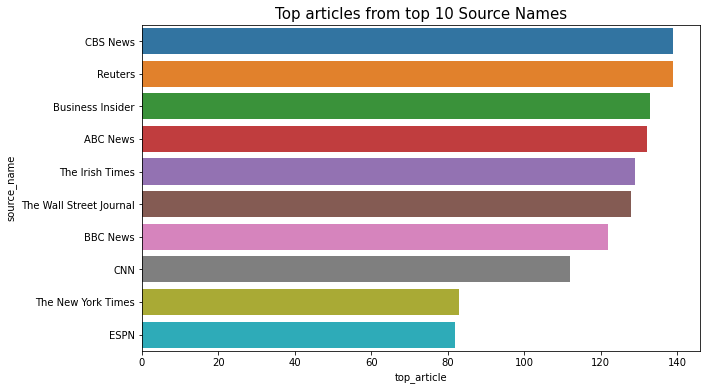

In [173]:
top10_article = df.groupby(['source_name'])['top_article'].sum().sort_values(ascending=False).reset_index().head(10)
top10_article

plt.figure(figsize=(10, 6))
plt.title('Top articles from top 10 Source Names', fontsize=15)
sns.barplot(y=top10_article['source_name'], x=top10_article['top_article'], data=top10_article)
plt.show()

- In the top 10 articles from source names, we see that CBS News and Reuters have more articles as a source. BBC News comes at the 7th position which is suprising since they were in second position in frequency of source articles

In conclusion, having more articles doesn't mean that the articles will be most read or top articles. This is evident from BBC News articles frequency from source and top articles.

### Top engagement reaction in title and description depending with source names

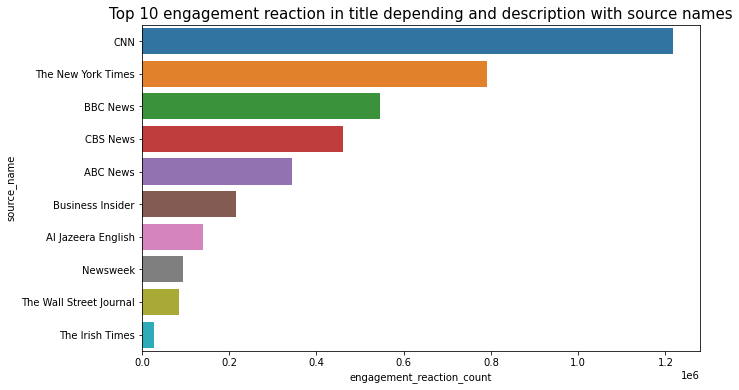

In [187]:
engagement_title_reaction = df.groupby(['source_name'])['title', 'description', 'engagement_reaction_count'].sum().sort_values(by ='engagement_reaction_count', ascending=False).reset_index().head(10)
engagement_title_reaction

plt.figure(figsize=(10, 6))
plt.title('Top 10 engagement reaction in title depending and description with source names', fontsize=15)
sns.barplot(y=engagement_title_reaction['source_name'], 
            x=engagement_title_reaction['engagement_reaction_count'], 
            data=engagement_title_reaction)
plt.show()

- The most engaged articles are from CNN as a source, followed by The New York Times then BBC News. 

CNN didn't have the most top articles from top sources but it's articles are the most enageged ones so far.

In [198]:
cnn = df[df['source_name']=='CNN'].sort_values(by='engagement_reaction_count', ascending=False).head(10)

In [201]:
cnn.columns

Index(['source_name', 'author', 'title', 'description', 'url', 'content',
       'top_article', 'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count'],
      dtype='object')

In [219]:
most_reacted_on_cnn = list(cnn['description'][:11])

In [230]:
most_reacted_on_cnn

['Jimmy Carter, the oldest living former U.S. president, turns 95 cnn.com',
 'After Hurricane Dorian blew the roof off his house on Abaco, the real challenge started for Brent Lowe.',
 'Hurricane Dorian may have long since left the Bahamas, but the islands have only begun to grapple with the grim aftermath.',
 "The US Army has plenty of famous examples of brother generals, but sisters? Now that's another story.",
 'President Donald Trump said Tuesday that he has asked national security adviser John Bolton to resign, noting that he "strongly disagreed with many of his suggestions as did others in the administration."',
 'The House Judiciary Committee is prepared to vote next week on a resolution laying out the procedures for its investigation now that it is actively considering moving to impeach President Donald Trump, a major step toward formalizing its sweeping probe, accor…',
 'More than 300 former national security officials have come out in support of an impeachment inquiry into Do

#### WordCloud

In [243]:
from wordcloud import WordCloud, STOPWORDS
import os
from io import StringIO

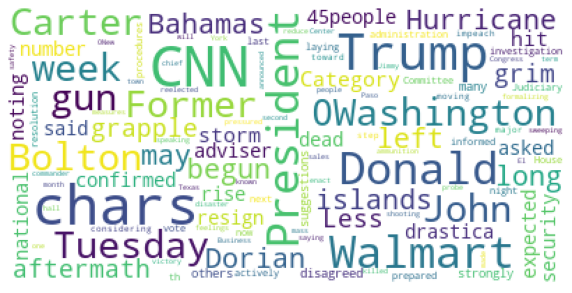

In [255]:
si=StringIO()
cnn['content'].apply(lambda x: si.write(str(x)))
s=si.getvalue()
si.close()
s[0:10000]

text = s

wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color ='white', max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud of top 3 description with top comments

In [253]:
top_comments = df.groupby(['description'])['source_name', 'author','engagement_comment_count'].sum().sort_values(by='engagement_comment_count', ascending=False).reset_index().head(10)
top_comments

,description,engagement_comment_count
0,"Robert Mugabe, Zimbabwe's first post-independe...",48490.0
1,"Jimmy Carter, the oldest living former U.S. pr...",41293.0
2,Walmart on Tuesday announced changes to its gu...,22147.0
3,Amber Guyger convicted of murder in wrong-apar...,20128.0
4,President Donald Trump said Tuesday that he ha...,19687.0
5,Phillip Lee's move leaves Boris Johnson with n...,19043.0
6,The administration is expected to complete the...,15834.0
7,President Trump had complained privately in re...,15742.0
8,Latest reaction as Prime Minister Boris Johnso...,15261.0
9,The House Judiciary Committee is prepared to v...,14617.0


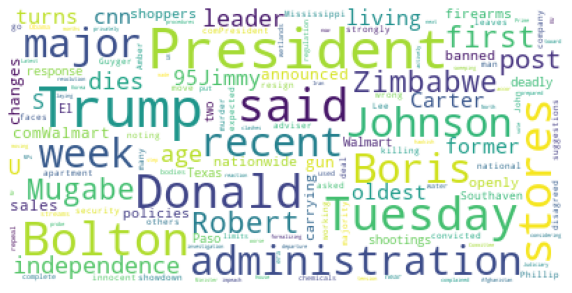

In [254]:
si=StringIO()
top_comments['description'].apply(lambda x: si.write(str(x)))
s=si.getvalue()
si.close()
s[0:10000]

text = s

wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color ='white', max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Summary Stats
- [x] summary stats for both numerical and categorical

In [177]:
df.describe()

,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,0.122066,377.083261,122.630641,194.017630,0.011498
std,0.327377,4408.394034,959.967634,1015.105468,0.266757
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,41.000000,11.000000,47.000000,0.000000
max,1.000000,354132.000000,48490.000000,39422.000000,15.000000


In [178]:
df.describe(include='O')

,source_name,author,title,description,url,content
count,10437,10437,10437,10437,10437,10437
unique,13,2581,9811,9174,10434,8386
top,Reuters,0,Quickly catch up on the day's news,"Get breaking national and world news, broadcas...",https://www.cbsnews.com/video/lil-nas-x-on-his...,0
freq,1252,1020,6,408,2,1292
